In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

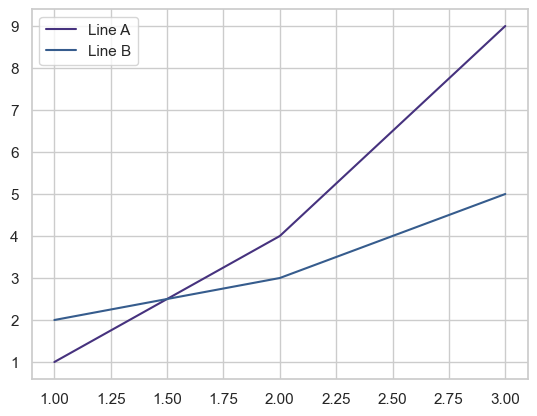

In [4]:
sns.set_theme(style='whitegrid', palette='viridis')
plt.plot([1, 2, 3], [1, 4, 9], label='Line A')
plt.plot([1, 2, 3], [2, 3, 5], label='Line B')
plt.legend()
plt.show()

In [5]:

images = os.listdir('../data/train-image/image')

In [6]:
len(images)

401059

In [7]:
metadata = pd.read_csv('../data/train-metadata.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_12904\3540286765.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('../data/train-metadata.csv')


In [8]:
images[0]

'ISIC_0015670.jpg'

In [9]:
metadata.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [10]:
metadata.shape

(401059, 55)

In [11]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [12]:
metadata.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


In [13]:
metadata.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [14]:
data = pd.DataFrame(columns=['isic_id', 'image', ])

In [15]:
import matplotlib.pyplot as plt

In [16]:
metadata['sex'].value_counts()

sex
male      265546
female    123996
Name: count, dtype: int64

<Axes: >

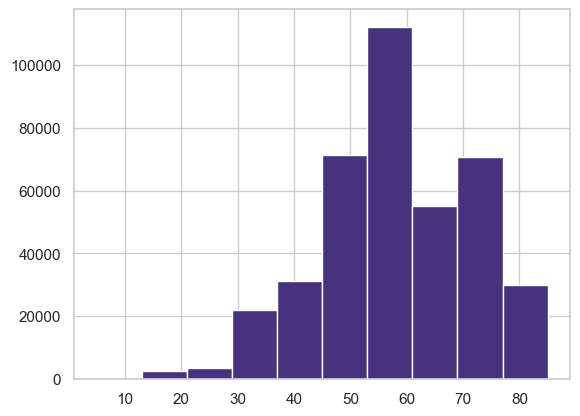

In [17]:
metadata['age_approx'].hist()

In [18]:
metadata['target'].value_counts()

target
0    400666
1       393
Name: count, dtype: int64

In [19]:
pd.read_csv('../data/sample_submission.csv')

,isic_id,target
0,ISIC_0015657,0.3
1,ISIC_0015729,0.3
2,ISIC_0015740,0.3


In [20]:
import h5py

In [21]:
f = h5py.File('../data/train-image.hdf5', 'r')

Image quantity: 401059


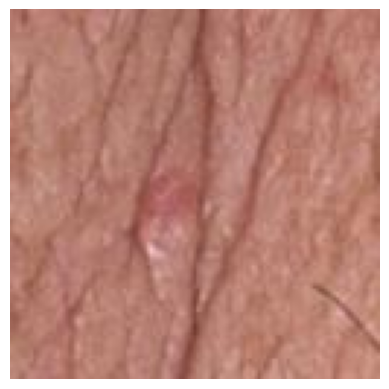

In [22]:
import io
from PIL import Image

filename = '../data/train-image.hdf5'
key = 'ISIC_0015845'

with h5py.File(filename, 'r') as f:
    # The [()] syntax reads the scalar dataset into a numpy void/bytes object
    print('Image quantity:', len(list(f.keys())))
    raw_data = f[key][()]
    img_bytes = raw_data
    img_stream = io.BytesIO(img_bytes)
    img = Image.open(img_stream)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [23]:
test_metadata = pd.read_csv('../data/test-metadata.csv')
test_metadata.head()

,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,...,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
1,ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,...,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,...,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


In [24]:
df = pd.read_csv('../data/train-metadata.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_12904\369468828.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/train-metadata.csv')


In [25]:
df.iloc[0]

isic_id                                                   ISIC_0015670
target                                                               0
patient_id                                                  IP_1235828
age_approx                                                        60.0
sex                                                               male
anatom_site_general                                    lower extremity
clin_size_long_diam_mm                                            3.04
image_type                                          TBP tile: close-up
tbp_tile_type                                                3D: white
tbp_lv_A                                                     20.244422
tbp_lv_Aext                                                  16.261975
tbp_lv_B                                                     26.922447
tbp_lv_Bext                                                  23.954773
tbp_lv_C                                                     33.684638
tbp_lv

In [26]:
df[(df['target'] == 0) & (df['iddx_full'] != 'Benign')][['target', 'iddx_full']]

,target,iddx_full
166,0,Benign::Benign epidermal proliferations::Liche...
272,0,Benign::Benign melanocytic proliferations::Nev...
515,0,Benign::Benign melanocytic proliferations::Nevus
1816,0,Benign::Benign melanocytic proliferations::Nevus
2338,0,Indeterminate::Indeterminate epidermal prolife...
...,...,...
399630,0,Benign::Benign melanocytic proliferations::Nev...
399921,0,Benign::Benign melanocytic proliferations::Nev...
400295,0,Benign::Benign melanocytic proliferations::Nev...
400523,0,Benign::Benign epidermal proliferations::Sebor...


In [27]:
df.iloc[166][['target', 'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5']]

target                                                       0
iddx_full    Benign::Benign epidermal proliferations::Liche...
iddx_1                                                  Benign
iddx_2                         Benign epidermal proliferations
iddx_3                            Lichen planus like keratosis
iddx_4                                                     NaN
iddx_5                                                     NaN
Name: 166, dtype: object

In [28]:
df[(df['target'] == 0) & (df['iddx_full'] != 'Benign')][['target', 'iddx_full']].iloc[0]['iddx_full']

'Benign::Benign epidermal proliferations::Lichen planus like keratosis'

In [29]:
df['anatom_site_general'].value_counts()

anatom_site_general
posterior torso    121902
lower extremity    103028
anterior torso      87770
upper extremity     70557
head/neck           12046
Name: count, dtype: int64

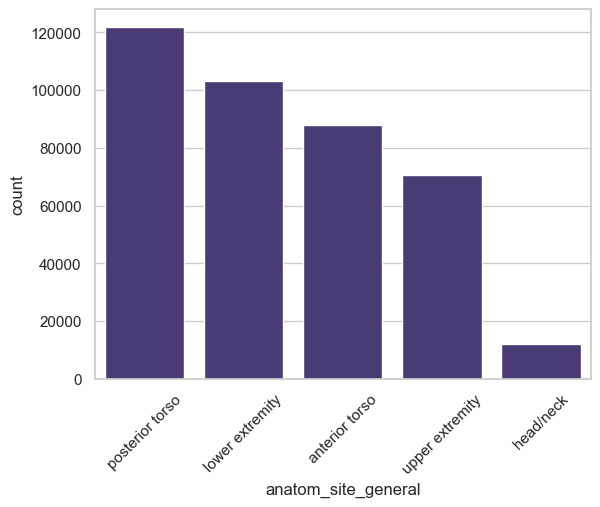

In [30]:
import seaborn as sns
anatom_sites = df['anatom_site_general'].value_counts()
sns.barplot(data=anatom_sites)
plt.xticks(rotation=45)
plt.show()

In [31]:
df['attribution'].value_counts()

attribution
Memorial Sloan Kettering Cancer Center                                                                                                                 129068
Department of Dermatology, Hospital Clínic de Barcelona                                                                                                105724
University Hospital of Basel                                                                                                                            65218
Frazer Institute, The University of Queensland, Dermatology Research Centre                                                                             51768
ACEMID MIA                                                                                                                                              28665
ViDIR Group, Department of Dermatology, Medical University of Vienna                                                                                    12640
Department of Dermatology, University of

In [32]:
locations_counts = df['attribution'].value_counts()
shortened_names = [
    f'{name[:50]}...' if len(name) > 50 else name 
    for name in locations_counts.index
]

<Axes: >

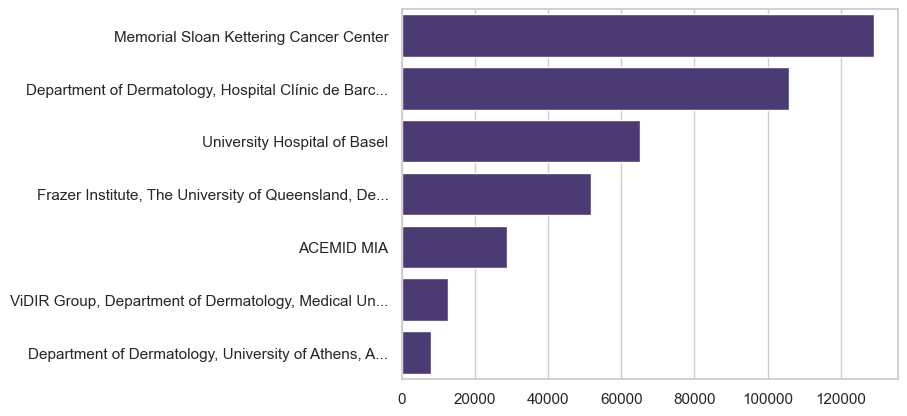

In [33]:
sns.barplot(x=locations_counts.values, y=shortened_names)

In [48]:
df['patient_id'].unique().shape[0]

1042

In [41]:
df['patient_id'].value_counts()

patient_id
IP_1117889    9184
IP_5714646    6267
IP_3921915    5568
IP_7797815    4454
IP_9577633    3583
              ... 
IP_4004571       1
IP_1216329       1
IP_5792391       1
IP_1487179       1
IP_7696347       1
Name: count, Length: 1042, dtype: int64

<Axes: xlabel='sex'>

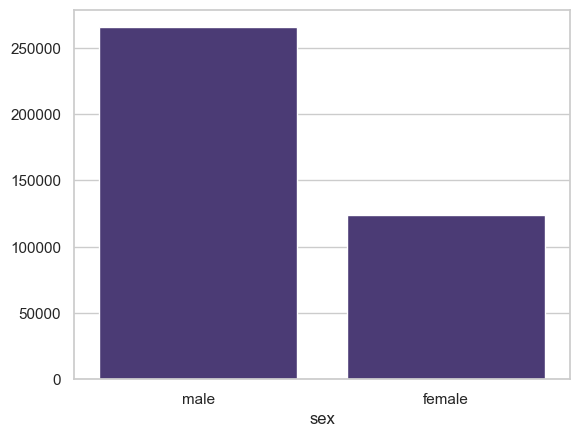

In [34]:
sex_counts = df['sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values)

In [35]:
images_path = '../data/train-image/image'

In [36]:
from pathlib import Path
img_path = Path(images_path, os.listdir(images_path)[0])
img_path

WindowsPath('../data/train-image/image/ISIC_0015670.jpg')

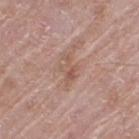

In [37]:
from PIL import Image

image = Image.open(img_path)
image

In [38]:
np.array(image).shape

(139, 139, 3)

In [39]:
import random
from tqdm import tqdm

all_files = [f.path for f in os.scandir(images_path) if f.name.endswith('.jpg')]

sample_files = random.sample(all_files, 10000)

shapes = []
for p in tqdm(sample_files):
    with Image.open(p) as img:
        shapes.append(img.size)
shapes

 63%|██████▎   | 6277/10000 [00:59<00:35, 105.66it/s]


KeyboardInterrupt: 

In [ ]:
len(set(shapes))

In [ ]:
h_values, w_values = zip(*shapes)

In [ ]:
print('min height:', min(h_values))
print('max height:', max(h_values))
print('min width:', min(w_values))
print('max width:', max(w_values))

In [ ]:
sns.histplot(h_values);

In [ ]:
sum([h != w for h, w in shapes])